<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

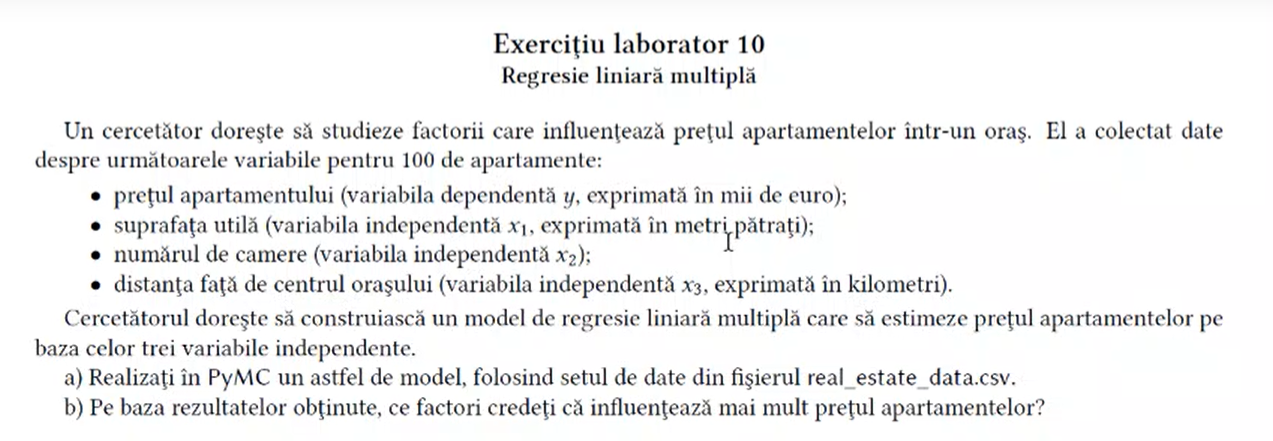

In [7]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az

data = pd.read_csv('real_estate_data.csv')

#data_normalized = (data - data.mean()) / data.std()
data_normalized = data

surface = data_normalized['Surface_area'].values
rooms = data_normalized['Rooms'].values
dist = data_normalized['Distance_to_center'].values
y = data_normalized['Price'].values

with pm.Model() as linear_regression_model:
    alpha = pm.Normal('alpha', mu=100, sigma=50)
    beta1 = pm.Normal('beta1', mu=2, sigma=2)
    beta2 = pm.Normal('beta2', mu=7, sigma=3)
    beta3 = pm.Normal('beta3', mu=200, sigma=100)

    eps = pm.HalfCauchy('eps', 5)

    mu = alpha + beta1 * surface + beta2 * rooms + beta3*dist

    y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=y)

    idata = pm.sample(1000, return_inferencedata=True)

az.summary(idata)


Output()

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,35.709,2.619,30.843,40.373,0.086,0.061,928.0,1131.0,1.0
beta1,2.466,0.019,2.430,2.503,0.001,0.000,1127.0,891.0,1.0
beta2,9.250,0.463,8.464,10.175,0.013,0.009,1251.0,1327.0,1.0
beta3,-3.092,0.193,-3.453,-2.744,0.005,0.004,1471.0,1283.0,1.0
eps,5.499,0.411,4.733,6.240,0.009,0.007,1971.0,1284.0,1.0
